In [ ]:
import numpy as np
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [ ]:
# Importing following libraries for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# Importing performance metrics
from sklearn import preprocessing,metrics

from sklearn.metrics import (accuracy_score, confusion_matrix, auc, precision_score, recall_score, f1_score, roc_curve, roc_auc_score)
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

Loading the pre-processed data

In [ ]:
# Read Database file using pd.read_csv command, pass CSV file name and path
DataSet = pd.read_csv('PreProcessedData.csv').fillna(0)
df = DataSet.copy()

Encoding the categorical variables:
Nominal features are dummy encoded and ordinal features are label encoded

In [ ]:
# Selecting nominal and ordinal features
nominal = df[['County', 'Category', 'Taxonomic Group', 'Taxonomic Subgroup', 'Scientific Name', 'Common Name', 'Year Last Documented', 'NY Listing Status']] # Excluding target variable
ordinal = df[['State Conservation Rank','Global Conservation Rank']]

In [ ]:
nominal.columns

Index(['County', 'Category', 'Taxonomic Group', 'Taxonomic Subgroup',
       'Scientific Name', 'Common Name', 'Year Last Documented',
       'NY Listing Status'],
      dtype='object')

In [ ]:
ordinal.columns

Index(['State Conservation Rank', 'Global Conservation Rank'], dtype='object')

ENCODING CATEGORICAL VARIABLES

Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories. While one-hot uses 3 variables to represent the data whereas dummy encoding uses 2 variables to code 3 categories.

In [ ]:
# Dummy encoding of nominal variables
nominal_encoded = pd.get_dummies(data= nominal, drop_first = True)

In [ ]:
nominal_encoded.head()

,County_Allegany,County_Atlantic Ocean and Long Island Sound,County_Bronx,County_Broome,County_Cattaraugus,County_Cayuga,County_Chautauqua,County_Chemung,County_Chenango,County_Clinton,...,NY Listing Status_Game with no open season,NY Listing Status_Game with open season,NY Listing Status_Protected - no open season,NY Listing Status_Protected Bird,NY Listing Status_Protected Bird - Game with open season,NY Listing Status_Rare,NY Listing Status_Special Concern,NY Listing Status_Threatened,NY Listing Status_not applicable,NY Listing Status_not listed
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# List of nominal features
nominal_encoded.columns

Index(['County_Allegany', 'County_Atlantic Ocean and Long Island Sound',
       'County_Bronx', 'County_Broome', 'County_Cattaraugus', 'County_Cayuga',
       'County_Chautauqua', 'County_Chemung', 'County_Chenango',
       'County_Clinton',
       ...
       'NY Listing Status_Game with no open season',
       'NY Listing Status_Game with open season',
       'NY Listing Status_Protected - no open season',
       'NY Listing Status_Protected Bird',
       'NY Listing Status_Protected Bird - Game with open season',
       'NY Listing Status_Rare', 'NY Listing Status_Special Concern',
       'NY Listing Status_Threatened', 'NY Listing Status_not applicable',
       'NY Listing Status_not listed'],
      dtype='object', length=2217)

In [ ]:
# Label encoding each ordinal variable
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
ordinal["State Conservation Rank"] = encoder1.fit_transform(df["State Conservation Rank"])
ordinal["Global Conservation Rank"] = encoder2.fit_transform(df["Global Conservation Rank"])

<ipython-input-101-2ae2341ff090>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal["State Conservation Rank"] = encoder1.fit_transform(df["State Conservation Rank"])
<ipython-input-101-2ae2341ff090>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal["Global Conservation Rank"] = encoder2.fit_transform(df["Global Conservation Rank"])


In [ ]:
ordinal.head()

,State Conservation Rank,Global Conservation Rank
0,9,4
1,7,4
2,9,4
3,9,4
4,9,4


In [ ]:
print(encoder1.classes_)

['S1' 'S1B' 'S1N' 'S2' 'S2B' 'S3' 'S3B' 'S4' 'S4B' 'S5' 'S5B' 'SH' 'SX']


In [ ]:
print(encoder2.classes_)

['G1' 'G2' 'G3' 'G4' 'G5' 'GH']


In [ ]:
# Combining both nominal and ordinal features
combined = pd.concat([nominal_encoded, ordinal], axis=1)

In [ ]:
nominal_encoded.shape

(14753, 2217)

In [ ]:
ordinal.shape

(14753, 2)

In [ ]:
combined.shape

(14753, 2219)

Label Encoding of Target variable: Distribution Status

In [ ]:
# Extracting target variable in y
y = df['Distribution Status']

In [ ]:
df['Distribution Status'].value_counts()

Recently Confirmed            12298
Historically Confirmed         1849
Possible but not Confirmed      413
Extirpated                      193
Name: Distribution Status, dtype: int64

Status of the presence of the species or natural community type in the given county, as recorded in the dataset’s source databases.
Values are: Recently confirmed = Documented, with confirmed identification, since 1980.
Historically confirmed = Last documented, with confirmed identification, before 1980; current presence is unknown, but could still be present.
Possible, but not confirmed = Has not been documented but has been confirmed nearby, or has been reported but identification has not been confirmed.
Extirpated = Has been documented in the past, but is now believed to no longer occur in the given county.

Functions for Multiclass classification

In [ ]:
#-------------------Functions for Confusion Matrix and Classification Report-------------------------

#target_names = ['Type1', 'Type2', 'Type4', 'Type8', 'Type16','Type0']

# The sequence of target_names must be taken from le.classes_ where y is target variable and le.classes_ contains encoding assigned to the classes of y (target variable)

def evaluate_classification_model(y_test, y_pred_test):

    target_names = ['Extirpated','Historically Confirmed','Possible but not Confirmed','Recently Confirmed']

    print(classification_report(y_test, y_pred_test, target_names=target_names))


    conf_matrix = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(data=conf_matrix, annot=True, fmt='g', xticklabels=target_names, yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xtickslabels(rotation=90)
    plt.ytickslabels(rotation=90)
    plt.yticks(target_names)
    plt.show()

In [ ]:
#------------------------------Function for drawing AUC curve-----------------------------------------------
# AUC curve Function with labelled labels and without One vs Rest strategy

def plot_curve(y_test, pred_prob, lab):

    target = ['Extirpated vs Rest','Historically Confirmed vs Rest','Possible but not Confirmed vs Rest', 'Recently Confirmed vs Rest']   # For new dataset, change here according to number and name of classes in target variable in order of le.classes_
    color = ['orange','green','blue','red']     # For new dataset, change here according to number of classes in target variable

    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = {}

    n_class = 4                                 # # For new dataset, change here according to number of classes in target variable


    for i in range(n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])



    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linestyle='--',color=color[i], label= target[i] +'AUC =' + "{:.2f}".format(roc_auc[i]))
        plt.title(lab + 'Multiclass ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')

In [ ]:
# Function for feature importance of multiclass classification
def feature_importance(model, X, label):
# Set importance features
    importance = model.feature_importances_

    d = {'Features':X.columns, 'Feature Importance': model.feature_importances_}
    dataframe = pd.DataFrame(d)

# Display the top 30 feature based on feature importance
    topFI = dataframe.sort_values(by='Feature Importance', ascending=False).head(30)

# Plot feature importance
    plt.rcParams["figure.figsize"] = (10, 10)

    y_axis = topFI['Features']
    x_axis = topFI['Feature Importance']
    plt.barh(y_axis, x_axis)
    plt.title('Plot FI: ' + label)
    plt.ylabel('Features')
    plt.xlabel('Feature Importance')
    plt.gca().invert_yaxis()
    #plt.savefig('/Models data/FI_RF_1l_new.png')
    plt.show()

In [ ]:
# Saving Trained model to disk
def save_model(model, filename):
    import pickle
    from os import path
    #pkl_filename = "...../Models data" + "/" + filename + ".pkl"
    pkl_filename = filename + ".pkl"
    if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
      with open(pkl_filename, 'wb') as file:
        pickle.dump(model, file)
      print("Saved model to disk")
    else:
      print("Previous Model exists on the disk! Please Remove")


**Model Building**

In [ ]:
# OneVsRest method is not required in Random forest as it is a rule based algorith and is able to do multiclass classification unlike binary classification algorithms
X = combined

Splitting features into train-test data with 30% of test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 1)

Label encoding of training target variable

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
le.classes_

array(['Extirpated', 'Historically Confirmed',
       'Possible but not Confirmed', 'Recently Confirmed'], dtype=object)

In [ ]:
y_train

array([3, 3, 3, ..., 3, 1, 3])

Model Building:

1. Random Forest

Hyper-parameter Tuning

Building pipeline with following steps:
1. SMOTe oversampling
2. Standardization and
3. model building
Following parameters are checked: n_estimators, max_depth and criterion
The random state is fixed in order to maintain the reproducibility of results.

In [ ]:
params = {'n_estimators': [50, 100, 200],
 'max_depth': [4, 6, 10, 12],
 'criterion': ['gini', 'entropy'],
 'random_state': [13]}


imba_pipeline = make_pipeline(SMOTE(random_state=42), StandardScaler(), RandomForestClassifier(random_state=13))
new_params = {'randomforestclassifier__' + key: params[key] for key in params} # Passing the parameters

Cross-validation with 5 folds is executed and accuracy is chosen as scoring parameter

In [ ]:
rs_imba = RandomizedSearchCV(imba_pipeline, new_params, cv=5, scoring='accuracy')
rs_imba.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=13))]),
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': [4,
                                                                              6,
                                                                              10,
                                                                              12],
                                        'randomforestclassifier__n_estimators': [50,
                                                                                 100,
                                                                                 200],
                                        'randomforestclassifier__random_state': [13]},
                   scoring='accuracy')

In [ ]:
# The following parameter values provides best accuracy
rs_imba.best_params_

{'randomforestclassifier__random_state': 13,
 'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__max_depth': 12,
 'randomforestclassifier__criterion': 'gini'}

In [ ]:
clfrf = rs_imba.best_estimator_
clfrf.classes_

array([0, 1, 2, 3])

Random Forest Model built with Best Parameters

Model is fitted on SMOTE balanced, standardized and label encoded data

In [ ]:
# Extracting set of features in X
X = combined
col = X.columns

# Standardizing all features

In [ ]:
# Standardization before train test splitting will result in standardized test data also.
sc_rf = StandardScaler()
X = sc_rf.fit_transform(X)
X = pd.DataFrame(X, columns = col)

In [ ]:
y = df['Distribution Status']

In [ ]:
le_rf = LabelEncoder()
y = le_rf.fit_transform(y)

In [ ]:
le_rf.classes_

array(['Extirpated', 'Historically Confirmed',
       'Possible but not Confirmed', 'Recently Confirmed'], dtype=object)

Splitting the dataset into train-test where 30% of data is test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 1)

SMOTe oversampling of training data is performed

In [ ]:
X_train_over_sampled, y_train_over_sampled = SMOTE(random_state=0).fit_resample(X_train, y_train)

The best hyper-parameters obtained above are manually feed into Random Forest classifier

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(max_depth = 12, n_estimators = 200, criterion = 'gini', random_state = 13))
sel.fit(X_train_over_sampled, y_train_over_sampled)

SelectFromModel(estimator=RandomForestClassifier(max_depth=12, n_estimators=200,
                                                 random_state=13))

**SelectFromModel will select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.**

In [ ]:
#Obtaining the selected features
sel.get_support()

array([False, False, False, ...,  True,  True,  True])

In [ ]:
# There are 114 features which has importance more than mean importance
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

114

In [ ]:
print(selected_feat)

Index(['County_Chautauqua', 'County_Clinton', 'County_Dutchess', 'County_Erie',
       'County_Essex', 'County_Kings', 'County_Madison', 'County_Monroe',
       'County_Nassau', 'County_New York',
       ...
       'NY Listing Status_Game with open season',
       'NY Listing Status_Protected Bird',
       'NY Listing Status_Protected Bird - Game with open season',
       'NY Listing Status_Rare', 'NY Listing Status_Special Concern',
       'NY Listing Status_Threatened', 'NY Listing Status_not applicable',
       'NY Listing Status_not listed', 'State Conservation Rank',
       'Global Conservation Rank'],
      dtype='object', length=114)


**Random Forest: Extracting selected columns**

In [ ]:
#X = X[selCols]  # X has standardized data
X = X[selected_feat]
col = X.columns

In [ ]:
X

,County_Chautauqua,County_Clinton,County_Dutchess,County_Erie,County_Essex,County_Kings,County_Madison,County_Monroe,County_Nassau,County_New York,...,NY Listing Status_Game with open season,NY Listing Status_Protected Bird,NY Listing Status_Protected Bird - Game with open season,NY Listing Status_Rare,NY Listing Status_Special Concern,NY Listing Status_Threatened,NY Listing Status_not applicable,NY Listing Status_not listed,State Conservation Rank,Global Conservation Rank
0,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,5.221346,-0.88954,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,-0.248032,0.608559,0.343239
1,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,5.221346,-0.88954,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,-0.248032,0.036562,0.343239
2,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,5.221346,-0.88954,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,-0.248032,0.608559,0.343239
3,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,5.221346,-0.88954,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,-0.248032,0.608559,0.343239
4,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,5.221346,-0.88954,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,-0.248032,0.608559,0.343239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14748,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,-0.191522,-0.88954,-0.249874,-0.201202,-0.253982,3.126736,-0.174921,-0.248032,-1.107433,-1.705226
14749,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,-0.191522,-0.88954,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,-0.248032,-1.965430,0.343239
14750,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,-0.191522,-0.88954,-0.249874,-0.201202,-0.253982,3.126736,-0.174921,-0.248032,-1.107433,-1.705226
14751,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,-0.191522,-0.88954,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,4.031745,0.036562,0.343239


In [ ]:
len(X.columns)

114

In [ ]:
# Saving the selected features from Random Forest model as csv file
X.to_csv('Biodiversity_selectedFeatures_rf.csv', index = True)

Spliting the dataset into 30% of test data and 70% of training data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)

In [ ]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 12, random_state = 13, criterion = 'gini')

In [ ]:
# Fitting the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=13)

In [ ]:
# Predictions from Random Forest model
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)

                            precision    recall  f1-score   support

                Extirpated       0.68      0.30      0.42        63
    Historically Confirmed       0.61      0.72      0.66       547
Possible but not Confirmed       0.77      0.08      0.14       127
        Recently Confirmed       0.95      0.97      0.96      3689

                  accuracy                           0.90      4426
                 macro avg       0.75      0.52      0.54      4426
              weighted avg       0.90      0.90      0.89      4426



AttributeError: module 'matplotlib.pyplot' has no attribute 'xtickslabels'

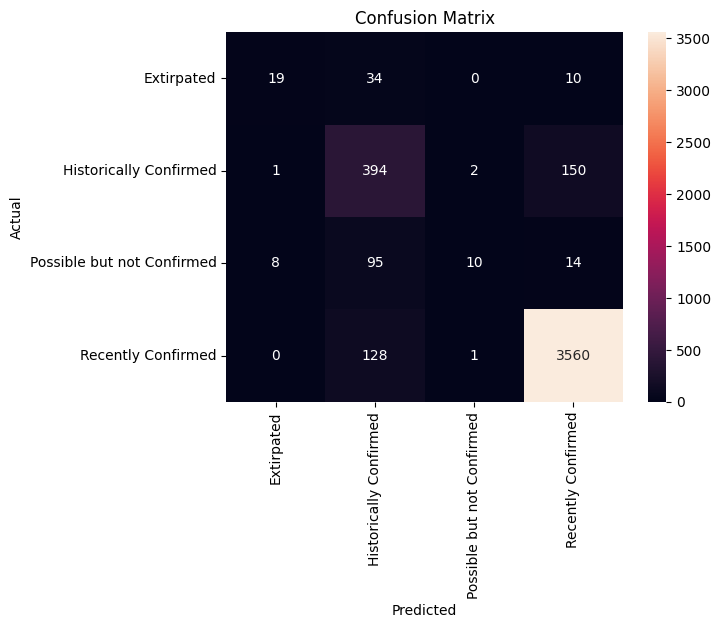

In [ ]:
# Confusion Matrix
evaluate_classification_model(y_test, y_pred)

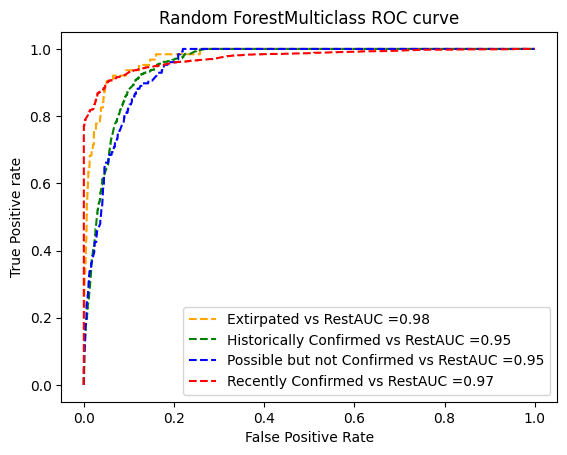

In [ ]:
# AUC curve
plot_curve(y_test, y_pred_prob, 'Random Forest')

In [ ]:
# Saving the model
save_model(rf, 'model_Rf2')

Saved model to disk


**Model: XGBoost**

Pipeline steps: SMOTE, Standardization and Classifier fitting so we don't apply standardization and data balancing on data for fitting. Model is fitted on X_train and y_train which is neither balanced nor standardized because these functions will be performed through pipeline. Only label encoding of target variable y is performed.

In [ ]:
# Extracting all features in X
X = combined
col = X.columns

In [ ]:
X

,County_Allegany,County_Atlantic Ocean and Long Island Sound,County_Bronx,County_Broome,County_Cattaraugus,County_Cayuga,County_Chautauqua,County_Chemung,County_Chenango,County_Clinton,...,NY Listing Status_Protected - no open season,NY Listing Status_Protected Bird,NY Listing Status_Protected Bird - Game with open season,NY Listing Status_Rare,NY Listing Status_Special Concern,NY Listing Status_Threatened,NY Listing Status_not applicable,NY Listing Status_not listed,State Conservation Rank,Global Conservation Rank
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,3
14749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
14750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,3
14751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,7,4


In [ ]:
# Extracting target variable in y
y = df['Distribution Status']

In [ ]:
df['Distribution Status'].value_counts()

Recently Confirmed            12298
Historically Confirmed         1849
Possible but not Confirmed      413
Extirpated                      193
Name: Distribution Status, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 1)

Label encoding the target variable

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
le.classes_

array(['Extirpated', 'Historically Confirmed',
       'Possible but not Confirmed', 'Recently Confirmed'], dtype=object)

In [ ]:
y_train

array([3, 3, 3, ..., 3, 1, 3])

Model Building:

1. XGBoost

Hyper-parameer tuning
Building pipeline for XGoost model

In [ ]:
params = {
"xgbclassifier__learning_rate" : [0.05, 0.1, 0.20],
#"subsample" : [0.6, 0.8, 1.0],
"xgbclassifier__max_depth" : [3,4,5, 6, 8, 10],
"xgbclassifier__min_child_weight" : [1,3,5],
"xgbclassifier__gamma" : [0.0, 0.5, 1.0, 1.5]
    }

imba_pipeline = make_pipeline(SMOTE(), StandardScaler(), XGBClassifier(random_state=13))

xg_rv = RandomizedSearchCV(imba_pipeline, params, scoring = 'accuracy')

In [ ]:
xg_rv.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('smote', SMOTE()),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=Non...
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=13, ...))]),
                   param_distributions={'xgbclassifier__gamma': [0.0, 0.5, 1.0,
                                                                 1.5],
                                        'xgbclassifier__learning_rate': [0.05,
                                                                         0.1,
                                                                         0.2],
                                        'xgbclassifier__max_depth': [3, 4, 5, 6,
                                                                     8, 10],
                                        'xgbclassifier__min_child_weight': [1,
                                                                            3,
                                                                            5]},
                   scoring='accuracy')

In [ ]:
# Hyper-parameter values which provides best accuracy
xg_rv.estimator.get_params
xg_rv.best_params_

{'xgbclassifier__min_child_weight': 1,
 'xgbclassifier__max_depth': 10,
 'xgbclassifier__learning_rate': 0.2,
 'xgbclassifier__gamma': 1.0}

XG Boost Model with best hyperparameters

Model is fitted on balanced, standardized and label encoded data

In [ ]:
X = combined
col = X.columns

In [ ]:
X

,County_Allegany,County_Atlantic Ocean and Long Island Sound,County_Bronx,County_Broome,County_Cattaraugus,County_Cayuga,County_Chautauqua,County_Chemung,County_Chenango,County_Clinton,...,NY Listing Status_Protected - no open season,NY Listing Status_Protected Bird,NY Listing Status_Protected Bird - Game with open season,NY Listing Status_Rare,NY Listing Status_Special Concern,NY Listing Status_Threatened,NY Listing Status_not applicable,NY Listing Status_not listed,State Conservation Rank,Global Conservation Rank
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,3
14749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
14750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,3
14751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,7,4


# Standardizing all features

In [ ]:
sc_rf = StandardScaler()
X = sc_rf.fit_transform(X)
X = pd.DataFrame(X, columns = col)

In [ ]:
y = df['Distribution Status']

In [ ]:
# Label encoding the target variable
le_rf = LabelEncoder()
y = le_rf.fit_transform(y)

In [ ]:
le_rf.classes_

array(['Extirpated', 'Historically Confirmed',
       'Possible but not Confirmed', 'Recently Confirmed'], dtype=object)

Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 1)

SMOTe oversampling of training data

In [ ]:
X_train_over_sampled, y_train_over_sampled = SMOTE(random_state=0).fit_resample(X_train, y_train)

In [ ]:
# Creating Xg Boost model with selected best parameters
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(XGBClassifier(booster = 'gbtree', random_state=42, learning_rate=0.2, max_depth=10, gamma = 1.0, min_child_weight = 1))
sel.fit(X_train_over_sampled, y_train_over_sampled)

SelectFromModel(estimator=XGBClassifier(base_score=None, booster='gbtree',
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=1.0, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=0.2, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=10,
                                        max_leaves=None, min_child_weight=1,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=None,
                                        n_jobs=None, num_parallel_tree=None,
                                        random_state=42, ...))

**SelectFromModel will select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.**

In [ ]:
sel.get_support()

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

324

In [ ]:
print(selected_feat)

Index(['County_Allegany', 'County_Atlantic Ocean and Long Island Sound',
       'County_Bronx', 'County_Broome', 'County_Cattaraugus', 'County_Cayuga',
       'County_Chautauqua', 'County_Chemung', 'County_Chenango',
       'County_Clinton',
       ...
       'Year Last Documented_2018', 'Year Last Documented_2019',
       'Year Last Documented_2020', 'Year Last Documented_not available',
       'NY Listing Status_Protected Bird', 'NY Listing Status_Rare',
       'NY Listing Status_Threatened', 'NY Listing Status_not listed',
       'State Conservation Rank', 'Global Conservation Rank'],
      dtype='object', length=324)


**XGBoost: Extracting selected columns**

In [ ]:
X = X[selected_feat]
col = X.columns

In [ ]:
X

,County_Allegany,County_Atlantic Ocean and Long Island Sound,County_Bronx,County_Broome,County_Cattaraugus,County_Cayuga,County_Chautauqua,County_Chemung,County_Chenango,County_Clinton,...,Year Last Documented_2018,Year Last Documented_2019,Year Last Documented_2020,Year Last Documented_not available,NY Listing Status_Protected Bird,NY Listing Status_Rare,NY Listing Status_Threatened,NY Listing Status_not listed,State Conservation Rank,Global Conservation Rank
0,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,-0.418413,-0.88954,-0.201202,-0.319822,-0.248032,0.608559,0.343239
1,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,-0.418413,-0.88954,-0.201202,-0.319822,-0.248032,0.036562,0.343239
2,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,-0.418413,-0.88954,-0.201202,-0.319822,-0.248032,0.608559,0.343239
3,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,-0.418413,-0.88954,-0.201202,-0.319822,-0.248032,0.608559,0.343239
4,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,-0.418413,-0.88954,-0.201202,-0.319822,-0.248032,0.608559,0.343239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14748,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,2.389981,-0.88954,-0.201202,3.126736,-0.248032,-1.107433,-1.705226
14749,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,2.389981,-0.88954,-0.201202,-0.319822,-0.248032,-1.965430,0.343239
14750,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,2.389981,-0.88954,-0.201202,3.126736,-0.248032,-1.107433,-1.705226
14751,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,2.389981,-0.88954,-0.201202,-0.319822,4.031745,0.036562,0.343239


In [ ]:
# Saving the selected features from XGBoost model in drive
X.to_csv('Biodiversity_selFeatures_xgb.csv', index = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)

In [ ]:
# Creating Xg Boost model with selected best parameters where parameter values are filled manually
xgb = XGBClassifier(booster = 'gbtree', random_state=42, learning_rate=0.2, max_depth=10, gamma = 1.0, min_child_weight = 1)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Predictions of XGB model on test data
y_pred = xgb.predict(X_test)
y_pred_prob = xgb.predict_proba(X_test)

                            precision    recall  f1-score   support

                Extirpated       0.61      0.49      0.54        63
    Historically Confirmed       0.65      0.89      0.75       547
Possible but not Confirmed       0.60      0.12      0.20       127
        Recently Confirmed       0.99      0.96      0.97      3689

                  accuracy                           0.92      4426
                 macro avg       0.71      0.61      0.62      4426
              weighted avg       0.93      0.92      0.92      4426



AttributeError: module 'matplotlib.pyplot' has no attribute 'xtickslabels'

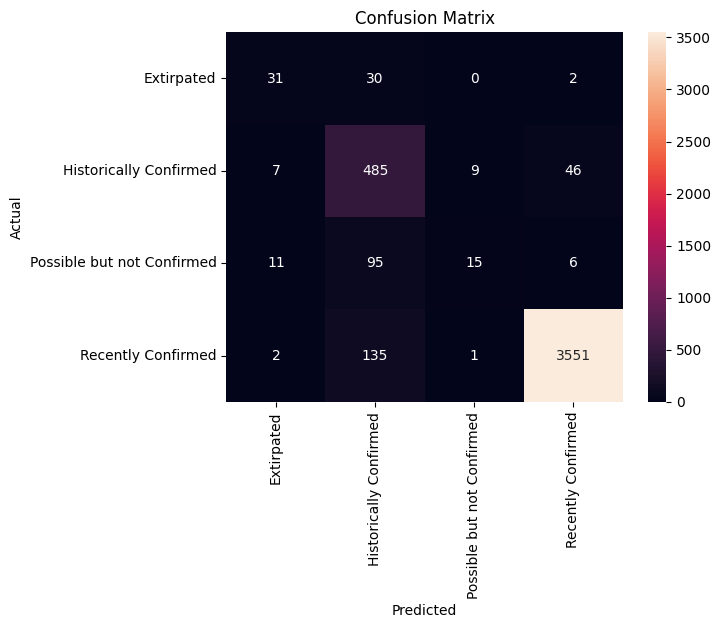

In [ ]:
# Confusion matrix
evaluate_classification_model(y_test, y_pred)

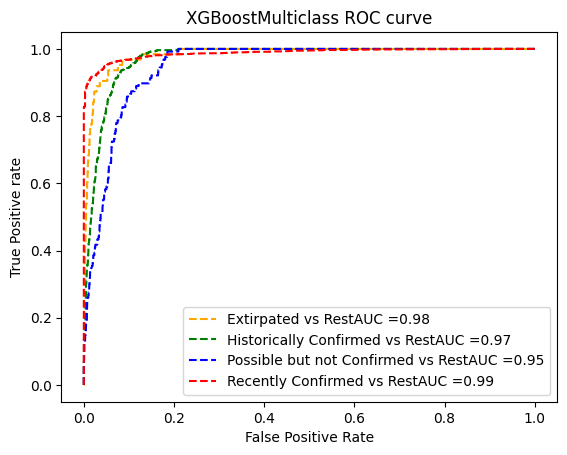

In [ ]:
# AUC curve of XGBoost model
plot_curve(y_test, y_pred_prob, 'XGBoost')

In [ ]:
save_model(xgb, 'model_Xgb2')

Saved model to disk
